# Correlação e Regressão

## Covariância, coeficiente de correlação e coeficiente de determinação

---

<table style='width:80%'>
    <tr>
        <th>Tamanho ${(m^2)}$</th>
        <th>Preço</th>
        <th>${x_i - \bar{x}}$</th>
        <th>${y_i - \bar{y}}$</th>
        <th>${\left (x_i - \bar{x}\right ) * \left (y_i - \bar{y}\right ) }$</th>
    </tr>
    <tr>
        <td>30</td>
        <td>57.000</td>
        <td>-14,5</td>
        <td>-16.250</td>
        <td>235.625</td>
    </tr>
    <tr>
        <td>39</td>
        <td>69.000</td>
        <td>-5,5</td>
        <td>-4.250</td>
        <td>23.375</td>
    </tr>
    <tr>
        <td>49</td>
        <td>77.000</td>
        <td>4,5</td>
        <td>3.750</td>
        <td>16.875</td>
    </tr>
    <tr>
        <td>60</td>
        <td>90.000</td>
        <td>15,5</td>
        <td>16.750</td>
        <td>259.625</td>
    </tr>
    <tr>
        <td>44,5 (Média) <br>12,92 (dp)</td>
        <td>73.250 (Média) <br>13.865,42 (DP)</td>
        <td></td>
        <td></td>
        <td>535.500 (Soma)</td>
    </tr>
</table>

---
### Covariância


- <big>${C_{(x,y)} = \frac{\sum{(x_i - \bar{x}) * (y_i - \bar{y})}}{n - 1}}$</big>
    

- <big>${C_{(x,y)} = \frac{535.500}{3} = 178500,00}$</big>


- ${C > 0}$, variáveis se movem juntas
- ${C < 0}$, variáveis se movem em direções opostas
- ${C = 0}$, variáveis são independentes

---

### Coeficiente de correlação


- <big>${Cr_{(x,y)} = \frac{Cov_{x,y}}{Std(x) * Std(y)}}$</big>


- <big>${Cr_{(x,y)} = \frac{178.500,00}{12,92 * 13.865,42} = 0,99}$</big>


- ${Cr >= -1}$, Correlação negativa (Variável explanatória aumenta e dependente diminui)
- ${Cr <= 1}$, Correlação positiva (Variável explanatória aumenta e dependente aumenta)

---

<table>
    <tr>
        <th>Correlação</th>
        <th>Interpretação</th>
    </tr>
    <tr>
        <td>0,00 a 0,19 | 0,00 a -0,19</td>
        <td>Correlação bem fraca</td>
    </tr>
    <tr>
        <td>0,20 a 0,39 | -0,20 a -0,39</td>
        <td>Correlação fraca</td>
    </tr>
    <tr>
        <td>0,40 a 0,69 | -0,40 a -0,69</td>
        <td>Correlação moderada</td>
    </tr>
    <tr>
        <td>0,70 a 0,89 | -0,70 a -0,89</td>
        <td>Correlação forte</td>
    </tr>
    <tr>
        <td>0,90 a 1,00 | -0,90 a -1,00</td>
        <td>Correlação muito forte</td>
    </tr>
</table>

---

### Coeficiente de determinação


- <big>${Cd_{(x,y)} = Cr^2}$</big>


- <big>${Cd_{(x,y)} = 0,99^2}$</big>


- <big>${Cd_{(x,y)} = 0,98}$</big>


- ${98\%}$ da variável dependente consegue ser explicada pelas variáveis explantórias

### Implementação

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Base de dados

In [2]:
tamanho = np.array([30,39,49,60])
preco = np.array([57000,69000,77000,90000])

In [3]:
df = pd.DataFrame({'tamanho':tamanho,'preco':preco})
df

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
tamanho_mean = df['tamanho'].mean()
preco_mean = df['preco'].mean()

tamanho_mean, preco_mean

(44.5, 73250.0)

In [5]:
tamanho_std = df['tamanho'].std()
preco_std = df['preco'].std()
tamanho_std, preco_std

(12.922847983320086, 13865.424623862047)

### Correlção - cálculo manual

In [6]:
df['dif'] = (df['tamanho'] - tamanho_mean) *(df['preco'] - preco_mean)
df

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
sum_dif = df['dif'].sum()
sum_dif

535500.0

In [8]:
cov = sum_dif / (len(df) - 1)
cov

178500.0

In [9]:
coef_c = cov / (tamanho_std * preco_std)
coef_c

0.9962006267707775

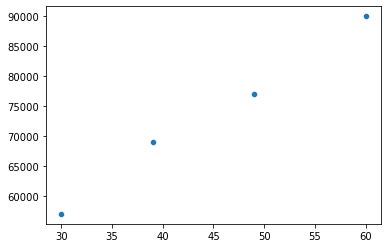

In [10]:
sns.scatterplot(x=tamanho, y=preco);

In [11]:
coef_d = pow(coef_c, 2)
coef_d

0.9924156887784898

### Correlação - cálculo com numpy e pandas

In [12]:
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [13]:
df.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [14]:
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [15]:
df.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


## Correlação com a biblioteca Yellowbrick

- https://www.scikit-yb.org/en/latest/

In [16]:
from yellowbrick.target import FeatureCorrelation

In [19]:
df = pd.read_csv("CSVs/house_prices.csv")

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
df.drop(['id','date','sqft_living','sqft_lot'], inplace = True, axis = 1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [25]:
len(df.columns[1:])

16

In [27]:
df.iloc[:, 1:17].values.shape

(21613, 16)

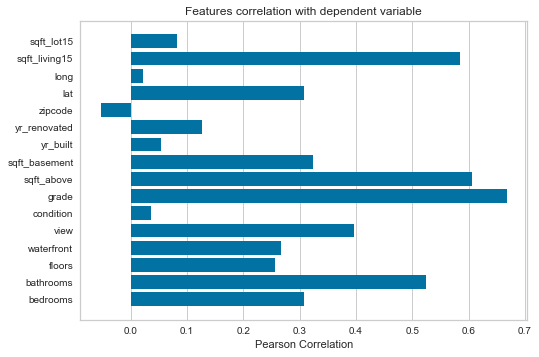

In [29]:
graph = FeatureCorrelation(labels = df.columns[1:])
graph.fit(df.iloc[:, 1:17].values, df.iloc[:,0].values)
graph.show();

## Regressão

- Correlação: relacionamento entre variáveis, uma variável afeta a outra. Duas vias: correlação de x sqft_living = correlação sqft_living x price
- Regressão é uma via: sqft_living para prever o preço, é diferente de utilizar o preço para prever sqft_living
- Espera-se que a correlação seja de moderada a forte para obter um bom modelo (positiva ou negativa)
- Coeficiente de determinação (R2): > 0.7 é um bom valor. Entre 0 e 0.3 é ruim. Entre esses valores é bom fazer testes
- Regressão linear: existe linearidade

### Regressão linear

- Modelagem da relação entre variáveis numéricas (variável dependente ${y}$ e variáveis explanatórias ${x}$)
- Temperatura, umidade e pressão do ar ${(x)}$ -> velocidade do vento ${(y)}$
- Gastos no cartão de crédito, histórico ${(x)}$ -> limite do cartão ${(y)}$
- Idade ${(x)}$ -> custo do plano de saúde ${(y)}$
- Tamnaho da casa ${(x)}$ -> preço da casa ${(y)}$



- <big>${y = b_0 + b_1 * x_1}$</big>

In [31]:
df = pd.read_csv("CSVs/house_prices.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df.drop(labels = ['id','date'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


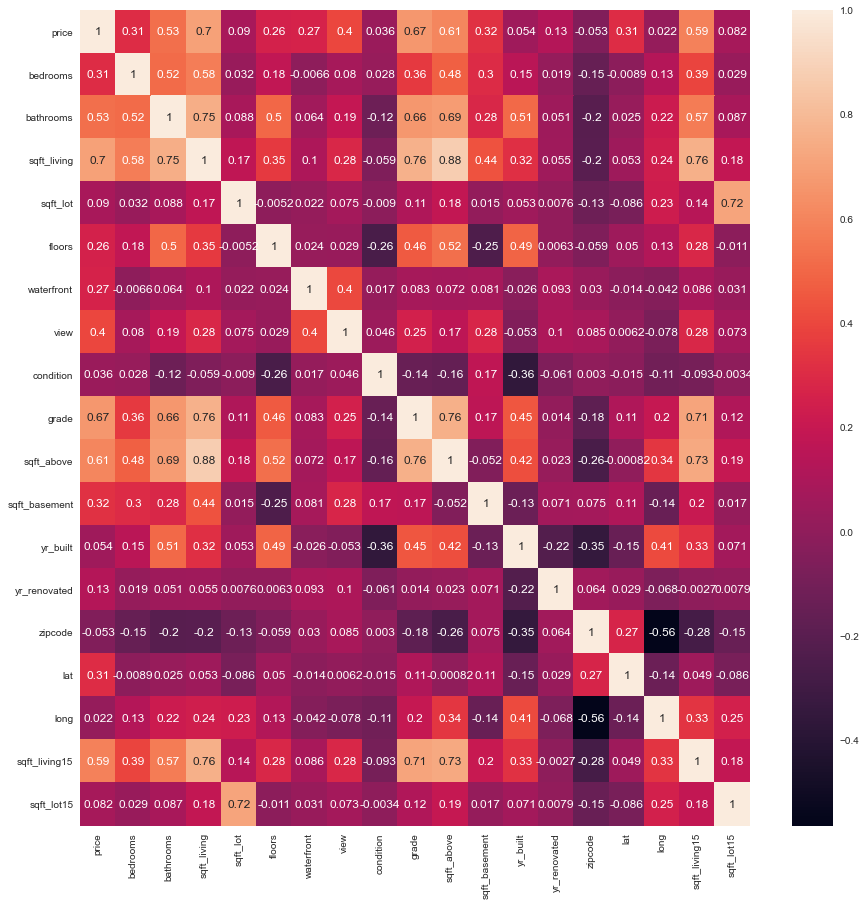

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True)

In [34]:
pow(0.7,2)

0.48999999999999994

In [35]:
X = df['sqft_living'].values
X.shape

(21613,)

In [36]:
X = X.reshape(-1,1)
X.shape

(21613, 1)

In [37]:
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 1), (4323, 1))

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
reg.intercept_

-30186.361061055097

In [42]:
reg.coef_

array([273.82181112])

In [43]:
reg.intercept_ + reg.coef_ * 770

array([180656.43350266])

In [44]:
reg.intercept_ + reg.coef_ * 500

array([106724.5444998])

In [45]:
reg.intercept_ + reg.coef_ * 900

array([216253.26894848])

In [46]:
reg.predict(np.array([[900]]))

array([216253.26894848])

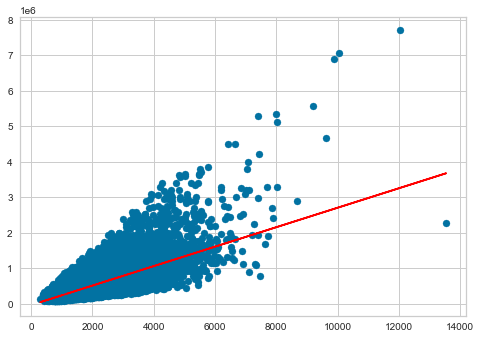

In [48]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red');

In [49]:
reg.score(X_train, y_train)

0.48876078213887486

In [51]:
reg.score(X_test, y_test)

0.5033019006466926

## Métricas de Erros

### Mean absolute error (MAE)

- Diferenças absolutas entre as previsões e os valores reais

- <big>${MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|}$</big>

### Mean square error (MSE)

- Diferenças elevadas ao quadrado (erros penalizados)

- <big>${MSE = \frac{1}{n}.\sum_{i = 1}^{n}\left (y_i - \hat{y}_i \right )^2}$</big>

### Root mean squared error (RMSE)

- Interpretação facilitada


- <big>${RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left ( y_i - \hat{y}_i\right )^2}}$</big>

In [52]:
pred = reg.predict(X_test)
pred, y_test

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mean_absolute_error(y_test, pred) # MAE

178578.01159005205

In [56]:
mean_squared_error(y_test, pred) # MSE

85730574276.16481

In [57]:
mean_squared_error(y_test, pred) ** 0.5 # RSME

292797.8385783693

### Regressão linear múltipla

- <big>${y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + + b_n * x_n}$</big>

In [58]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
X = df.iloc[:, [2,3,9,10]].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [60]:
y = df.iloc[:,0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 4), (4323, 4))

In [62]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
reg.score(X_train, y_train)

0.5429158715490658

In [64]:
reg.score(X_test, y_test)

0.5433655885394335

In [65]:
pred = reg.predict(X_test)
mean_absolute_error(y_test, pred)

163331.28566448105

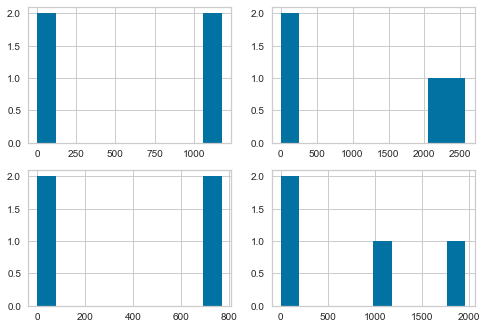

In [67]:
f, ax = plt.subplots(2,2)
ax[0][0].hist(X[0])
ax[0][1].hist(X[1])
ax[1][0].hist(X[2])
ax[1][1].hist(X[3]);

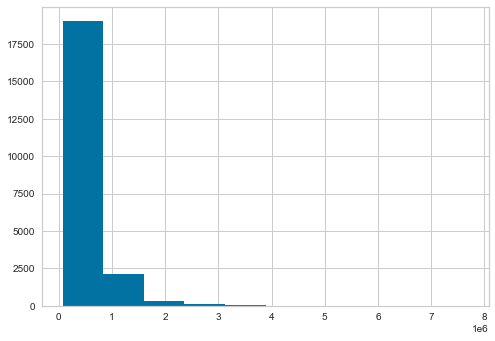

In [68]:
plt.hist(y);

In [69]:
y = np.log(y)

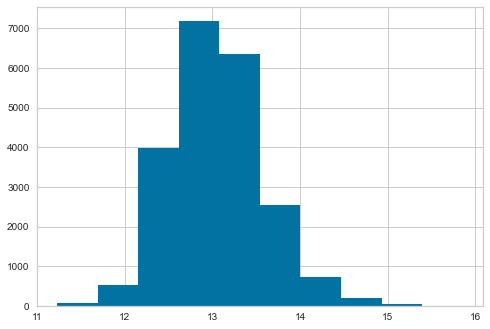

In [70]:
plt.hist(y);

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 4), (4323, 4))

In [72]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [73]:
reg.score(X_train, y_train)

0.559462085496587

In [74]:
reg.score(X_test, y_test)

0.583736323335128

### Seleção de atributos

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html

In [75]:
from sklearn.feature_selection import SelectFdr, f_regression

In [79]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
X = df.iloc[:,1:].values
y = np.log(df.iloc[:,0].values)

In [82]:
select = SelectFdr(f_regression, alpha = 0.00)
X_new = select.fit_transform(X, y)
X.shape, X_new.shape

((21613, 18), (21613, 10))

In [83]:
select.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 8.46862610e-049,
       0.00000000e+000, 1.69590132e-147, 0.00000000e+000, 5.97587299e-009,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.57770668e-032,
       5.57087200e-064, 1.76861607e-008, 0.00000000e+000, 2.03701491e-013,
       0.00000000e+000, 1.72325782e-041])

In [84]:
cols = select.get_support()
cols

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False, False, False,  True, False,  True, False])

In [85]:
df.columns[1:17]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [95]:
df.columns[1:19][cols == True]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 10), (4323, 10))

In [97]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [98]:
reg.score(X_train, y_train)

0.7259563750681556

In [99]:
reg.score(X_test, y_test)

0.7401406721071606